<div >
<img src = "../../banner.jpg" />
</div>

# Linear Regression for Prediction

Model 

$$
y= f(X) + u
$$

$$
y= X\beta + u
$$

Outcome to be predicted: $Y_i$

> *example:* a worker's log wage

Characteristics (aka **features**): $X_i=\left(X_{1i},\ldots,X_{pi}\right)'$

> *example:* education, age, state of birth, parents' education, cognitive ability, family background


In [1]:
#Load Packages
require("pacman")
p_load("tidyverse","stargazer")


Loading required package: pacman



In [2]:
nlsy = read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/nlsy97.csv')
nlsy = nlsy  %>%   drop_na(educ)

Rows: 1266 Columns: 994
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (994): lnw_2016, educ, black, hispanic, other, exp, afqt, mom_educ, dad_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
nlsy <- nlsy  %>% mutate(educ2=educ^2,
                         educ3=educ^3,
                         educ4=educ^4,
                         educ5=educ^5,
                         educ6=educ^6,
                         educ7=educ^7,
                         educ8=educ^8,
                         educ9=educ^9,
                         educ10=educ^10,
                        )

In [4]:
reg<- lm(lnw_2016~educ+ educ2 + educ3 + educ4 + educ5 + educ6 + educ7 + 
    educ8 + educ9 + educ10,   data = nlsy)
#reg <- lm(lnw_2016 ~ educ +I(educ^2)  +I(educ^3)  +I(educ^4)  +I(educ^5)  +I(educ^6)  +I(educ^7) 
#  +I(educ^8)  +I(educ^9)  +I(educ^10),   data = nlsy)
summary(reg)


Call:
lm(formula = lnw_2016 ~ educ + educ2 + educ3 + educ4 + educ5 + 
    educ6 + educ7 + educ8 + educ9 + educ10, data = nlsy)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9389 -0.4027 -0.0379  0.3567  4.4390 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.511e+05  1.298e+05   1.164    0.245
educ        -1.191e+05  1.010e+05  -1.179    0.239
educ2        4.178e+04  3.501e+04   1.193    0.233
educ3       -8.586e+03  7.114e+03  -1.207    0.228
educ4        1.145e+03  9.388e+02   1.220    0.223
educ5       -1.035e+02  8.410e+01  -1.231    0.219
educ6        6.428e+00  5.181e+00   1.241    0.215
educ7       -2.707e-01  2.168e-01  -1.249    0.212
educ8        7.406e-03  5.896e-03   1.256    0.209
educ9       -1.188e-04  9.418e-05  -1.261    0.207
educ10       8.492e-07  6.711e-07   1.265    0.206

Residual standard error: 0.8389 on 1255 degrees of freedom
Multiple R-squared:  0.0759,	Adjusted R-squared:  0.06854 
F-statistic: 10.31 on 10 and 125

In [5]:
stargazer(reg,type="text")


                        Dependent variable:    
                    ---------------------------
                             lnw_2016          
-----------------------------------------------
educ                       -119,110.500        
                           (101,045.400)       
                                               
educ2                       41,779.810         
                           (35,011.930)        
                                               
educ3                       -8,585.815         
                            (7,113.640)        
                                               
educ4                        1,144.828         
                             (938.762)         
                                               
educ5                        -103.507          
                             (84.098)          
                                               
educ6                          6.428           
                              (5.181)  

In [6]:
nlsy$yhat= predict(reg)

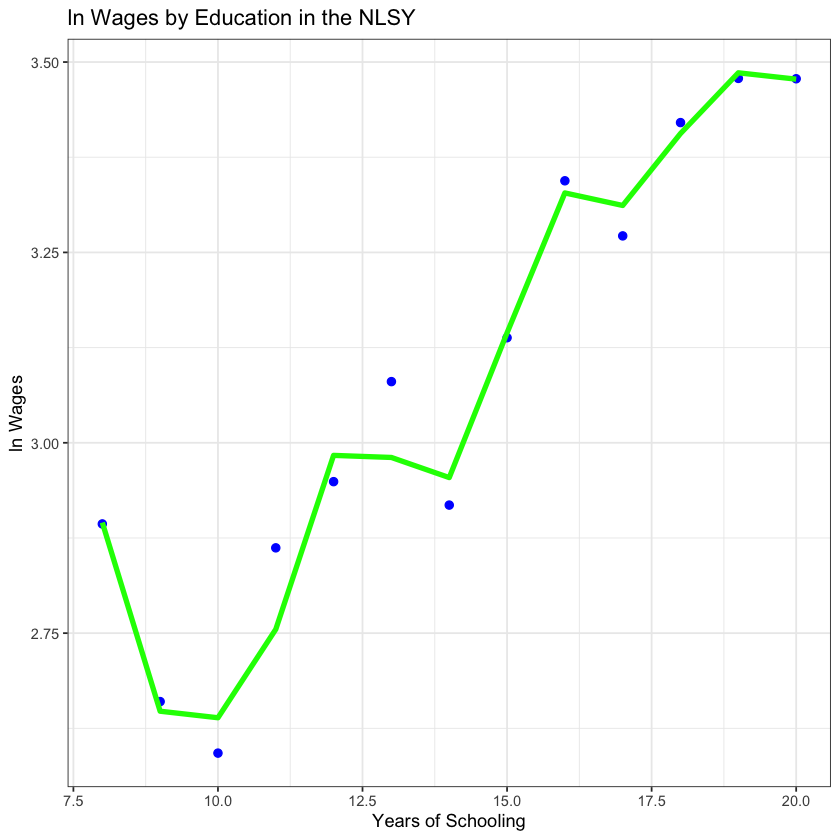

In [7]:
# plot predicted values
summ = nlsy %>%  
  group_by(
    educ, educ2, educ3, educ4, educ5, 
    educ6, educ7, educ8, educ9, educ10
  ) %>%  
  summarize(
    mean_y = mean(lnw_2016),
    yhat_reg = mean(yhat), .groups="drop"
  ) 
ggplot(summ) + 
  geom_point(
    aes(x = educ, y = mean_y),
    color = "blue", size = 2
  ) + 
  geom_line(
    aes(x = educ, y = yhat_reg), 
    color = "green", size = 1.5
  ) + 
  labs(
    title = "ln Wages by Education in the NLSY",
    x = "Years of Schooling",
    y = "ln Wages"
  ) +
  theme_bw()


As we can see, least squares linear regression can approximate any continuous function and can certainly be used for prediction. Include a rich enough set of transformations, and OLS predictions will yield unbiased estimates of the true ideal predictor, the conditional expectation function. But these estimates will be quite noisy. 

# Example 2


Two Models
 
 (1) $y=\beta_1 X_1 + u_1 $
 
 (2) $y=\beta_1 X_1 + \beta_2 X_2 + u_2$

 If model (1) is true then estimating the larger model (2) leads to inefficient though unbiased estimators due to unnecessarily including $X_2$.

If model (2) holds, estimating the smaller model (1) leads to a more efficient but biased estimate if $X_1$ is also correlated with the omitted regressor $X_2$. 
 

## Case 1

Let's show this: Suppose Model (1) is True, i.e. wage depends only on schooling but not ability

In [8]:
p_load("fabricatr")

#for reproducibility
set.seed(101010)


db1 <- fabricate(
  N = 100000,
  ability=rnorm(N,mean=.5,sd=2),
  schooling = round(runif(N, 2, 14)),
  logwage =rnorm(N, mean=7+.15*schooling, sd=20)
)

In [9]:
reg1<-lm(logwage~schooling,db1)

reg2<-lm(logwage~schooling+ability,db1)

stargazer(reg1,reg2,type="text")


                                    Dependent variable:                
                    ---------------------------------------------------
                                          logwage                      
                               (1)                       (2)           
-----------------------------------------------------------------------
schooling                   0.175***                  0.175***         
                             (0.018)                   (0.018)         
                                                                       
ability                                                -0.018          
                                                       (0.032)         
                                                                       
Constant                    6.829***                  6.838***         
                             (0.158)                   (0.159)         
                                                               

In [10]:
db1<- db1 %>% mutate(yhat_reg1=predict(reg1),
                     yhat_reg2=predict(reg2))


In [11]:
var(db1$yhat_reg1)


[1] 0.3710377

In [12]:
var(db1$yhat_reg2)

[1] 0.3723009

Estimating the larger model (2) leads to inefficient though unbiased estimators due to unnecessarily including $X_2$.

## Case 2

Now suppose Model (2) is True, i.e. wage depends on schooling AND ability, and they are correlated

In [13]:
db2 <- fabricate(
  N = 100000,
  ability=rnorm(N,mean=.5,sd=2),
  schooling = round(runif(N, 2, 14)),
  schooling = round(ceiling(schooling+1*ability)),
  logwage =rnorm(N, mean=7+.15*schooling+.25*ability, sd=20)
)

In [14]:
reg3<-lm(logwage~schooling,db2)

reg4<-lm(logwage~schooling+ability,db2)

stargazer(reg3,reg4,type="text")


                                     Dependent variable:                 
                    -----------------------------------------------------
                                           logwage                       
                               (1)                        (2)            
-------------------------------------------------------------------------
schooling                    0.254***                   0.179***         
                             (0.016)                    (0.018)          
                                                                         
ability                                                 0.300***         
                                                        (0.036)          
                                                                         
Constant                     6.158***                   6.675***         
                             (0.154)                    (0.167)          
                                     

In [15]:
db2$yhat_reg3<-predict(reg3)

db2$yhat_reg4<-predict(reg4)


In [16]:
var(db2$yhat_reg3)


[1] 1.050133

In [17]:
var(db2$yhat_reg4)

[1] 1.320984

Estimating the smaller model (1) leads to a more efficient but biased estimate when $X_1$ is also correlated with the omitted regressor $X_2$. 